In [1]:
# prepare the problem
# a) laod libraries
# b) load the dataset

In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
file_name = 'iris/iris.data'
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
dataset = read_csv(file_name, names=names)

In [4]:
# Summerize the data
# a) Statistics
# b) Data visulization

In [5]:
dataset.shape

(150, 5)

In [6]:
dataset.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [7]:
dataset.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

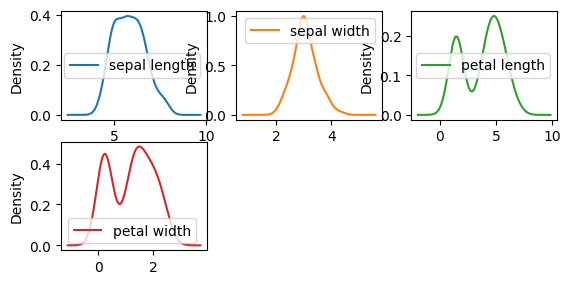

In [9]:
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

array([[<Axes: xlabel='sepal length', ylabel='sepal length'>,
        <Axes: xlabel='sepal width', ylabel='sepal length'>,
        <Axes: xlabel='petal length', ylabel='sepal length'>,
        <Axes: xlabel='petal width', ylabel='sepal length'>],
       [<Axes: xlabel='sepal length', ylabel='sepal width'>,
        <Axes: xlabel='sepal width', ylabel='sepal width'>,
        <Axes: xlabel='petal length', ylabel='sepal width'>,
        <Axes: xlabel='petal width', ylabel='sepal width'>],
       [<Axes: xlabel='sepal length', ylabel='petal length'>,
        <Axes: xlabel='sepal width', ylabel='petal length'>,
        <Axes: xlabel='petal length', ylabel='petal length'>,
        <Axes: xlabel='petal width', ylabel='petal length'>],
       [<Axes: xlabel='sepal length', ylabel='petal width'>,
        <Axes: xlabel='sepal width', ylabel='petal width'>,
        <Axes: xlabel='petal length', ylabel='petal width'>,
        <Axes: xlabel='petal width', ylabel='petal width'>]], dtype=object)

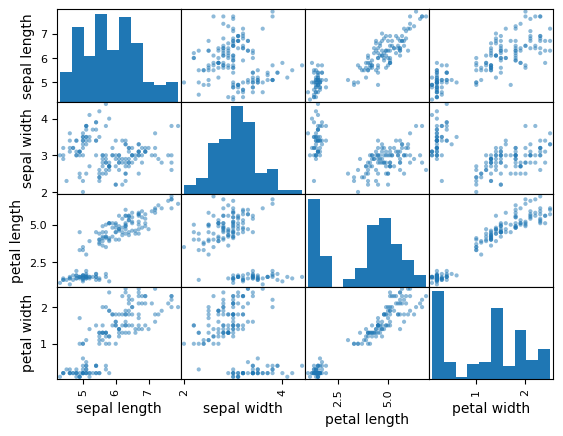

In [10]:
scatter_matrix(dataset)

In [ ]:
# Evaluate algorithms
# a) Test options and evaluate metrics
# b) Spot Check algorithms
# c) Compare algorithms

In [12]:
x = dataset.iloc[:, 0:4]
y = dataset.iloc[:, 4]
seed = 7
validation_size = 0.20 # 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [20]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [21]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f'{name}: {cv_results.mean()} ({cv_results.std()})'
    print(msg)

LR: 0.9833333333333332 (0.03333333333333335)
LDA: 0.975 (0.03818813079129868)
KNN: 0.9833333333333332 (0.03333333333333335)
CART: 0.9583333333333333 (0.07682953714410741)
NB: 0.9666666666666666 (0.04082482904638632)
SVM: 0.9833333333333332 (0.03333333333333335)


In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
preds = knn.predict(x_test)

print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

